<a href="https://colab.research.google.com/github/jlarson200/DSCI_592_NPL/blob/main/npl_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###DSCI 592 Team project based on a Kaggle Prediction Competition

###### The site details are: https://www.kaggle.com/c/nlp-getting-started/data

#####Natural Language Processing with Disaster Tweets
#####Predict which Tweets are about real disasters and which ones are not

## Initial Exploration of the Data

### Data Grab

In [1]:
from google.colab import drive
from google.colab import files

 
# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Joe's location
DSCI_592 = '/content/drive/My Drive/DSCI_592'
%cd {DSCI_592}
!ls
# https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab

/content/drive/.shortcut-targets-by-id/10-42_ifui6hlObPWvMMivdQwEFf6Vh43/DSCI 592
 Code			       'DSCI 592 Syllabus 2021.pdf'
 Data			        Notes.gdoc
 DSCI_592_deliverables.gdoc     Papers
'DSCI 592 Syllabus 2021.gdoc'  'Project proposal.gdoc'


### Data Check

###### Checking the train data set and displaying the 50 first rows

In [3]:
#Joe's way of getting data
import pandas as pd
df_train = pd.read_csv ('Data/train.csv')
df_train.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
# #Jenni's way since the locations are named differently...
# import pandas as pd
# df_train = pd.read_csv("/content/drive/MyDrive/DSCI 592/Data/train.csv", encoding="UTF-8")
# df_test = pd.read_csv("/content/drive/MyDrive/DSCI 592/Data/test.csv")

##### The shape of the train data set is:

In [5]:
df_train.shape

(7613, 5)

#####The train data set column headers are:

In [6]:
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

#####The info of train data set displays 5 columns and the count of data included 

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


#####The count of nulls by column is:

In [9]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

#####The count of keywords by targets 

This is to see if any of the keywords have unbalanced targets. For example Aftershock has 0 true disasters and Wreckage has 0 false disasters

In [10]:
pd.crosstab(columns = df_train.keyword, index = df_train.target,
                     margins=True, margins_name="Total")

keyword,ablaze,accident,aftershock,airplane%20accident,ambulance,annihilated,annihilation,apocalypse,armageddon,army,arson,arsonist,attack,attacked,avalanche,battle,bioterror,bioterrorism,blaze,blazing,bleeding,blew%20up,blight,blizzard,blood,bloody,blown%20up,body%20bag,body%20bagging,body%20bags,bomb,bombed,bombing,bridge%20collapse,buildings%20burning,buildings%20on%20fire,burned,burning,burning%20buildings,bush%20fires,...,storm,stretcher,structural%20failure,suicide%20bomb,suicide%20bomber,suicide%20bombing,sunk,survive,survived,survivors,terrorism,terrorist,threat,thunder,thunderstorm,tornado,tragedy,trapped,trauma,traumatised,trouble,tsunami,twister,typhoon,upheaval,violent%20storm,volcano,war%20zone,weapon,weapons,whirlwind,wild%20fires,wildfire,windstorm,wounded,wounds,wreck,wreckage,wrecked,Total
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23,11,34,5,18,23,19,23,37,29,10,26,11,14,26,21,15,9,33,33,30,31,30,33,30,32,28,32,28,40,19,19,2,6,11,5,26,24,16,7,...,17,30,12,3,1,1,30,27,23,9,10,8,9,26,7,19,14,23,20,33,28,23,35,1,32,7,9,17,25,22,25,4,4,24,11,23,30,0,36,4323
1,13,24,0,30,20,11,10,9,5,5,22,8,25,21,4,5,22,21,5,1,5,2,2,4,5,3,5,1,5,1,15,19,27,29,24,28,7,10,21,18,...,18,3,23,32,30,32,9,5,10,21,24,23,2,12,26,16,22,9,11,2,5,11,5,37,6,26,18,7,14,17,14,27,29,16,26,10,7,39,3,3229
Total,36,35,34,35,38,34,29,32,42,34,32,34,36,35,30,26,37,30,38,34,35,33,32,37,35,35,33,33,33,41,34,38,29,35,35,33,33,34,37,25,...,35,33,35,35,31,33,39,32,33,30,34,31,11,38,33,35,36,32,31,35,33,34,40,38,38,33,27,24,39,39,39,31,33,40,37,33,37,39,39,7552


##### The count of real and non real tweets is listed below, 1 is real and 0 is non real disasters

In [11]:
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

#####Plot of the real disasters vs non-real disasters in the data:

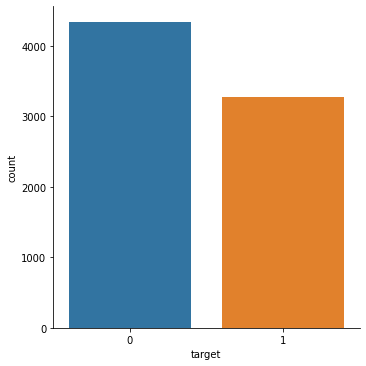

In [12]:
import seaborn as sns
g = sns.catplot(x="target",
                #row="keyword", 
                data=df_train, kind="count")

###Data Cleaning

The first thing to do is to make any adjustments such as cleaning up emojis and spelling errors before computing any counts. 

In [13]:
pip install emoji

In [14]:
import emoji

demoji_text = []

for row in df_train['text']:
  row2 = emoji.demojize(row, delimiters=(" ", " "))
  demoji_text.append(row2)

df_train['demoji_text'] = demoji_text

In [33]:
df_train['text_charter_count'] = df_train['text'].str.len()
print(df_train['text_charter_count'].mean())
print(df_train['text_charter_count'])

101.03743596479706
0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text_charter_count, Length: 7613, dtype: int64


In [15]:
df_train[df_train.apply(lambda x: x['text'] != x['demoji_text'], axis = 1)]

,id,keyword,location,text,target,demoji_text
2171,3114,debris,"46.950109,7.439469",How Missing JetÛªs Debris Could Have Floated ...,1,How Missing JetÛªs Debris Could Have Floated ...
2172,3115,debris,NaN,RÌ©union Debris Is Almost Surely From Flight 3...,1,RÌ copyright union Debris Is Almost Surely Fro...
2173,3116,debris,NaN,RÌ©union Debris Is Almost Surely From Flight 3...,1,RÌ copyright union Debris Is Almost Surely Fro...
2179,3123,debris,Seattle,#love #food #fun Malaysian Prime Minister Naji...,1,#love #food #fun Malaysian Prime Minister Naji...
3479,4974,explosion,NaN,Exploring New Worlds: Three Moments of an Expl...,1,Exploring New Worlds: Three Moments of an Expl...
4390,6241,hijacking,"South Pasadena, CA",@ladyfleur The example I used is even worse in...,0,@ladyfleur The example I used is even worse in...
7127,10209,volcano,? ??????? ? ( ?? å¡ ? ? ? å¡),nside a Dragon's belly. Or an ice cave under\n...,1,nside a Dragon's belly. Or an ice cave under\n...
7514,10747,wreckage,NaN,#science Now that a piece of wreckage from fli...,1,#science Now that a piece of wreckage from fli...
7527,10765,wreckage,iTunes,#science Now that a piece of wreckage from fli...,1,#science Now that a piece of wreckage from fli...
7532,10770,wreckage,iTunes,#science Now that a piece of wreckage from fli...,1,#science Now that a piece of wreckage from fli...


In [16]:
pip install pyspellchecker

In [17]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happenning
{'hapening', 'happenning'}


#tweet analysis

In [18]:
import numpy as np
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))

import string
# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

Leaving only characters and spaces

In [19]:
#Tokenize the text 
#Note from Jenni: Moving this lower so we can make sure to make any adjustments needed first.
import nltk
nltk.download('punkt')
df_train['unigrams'] = df_train['text'].apply(nltk.word_tokenize)
df_train['unigrams_two'] = df_train.apply(lambda row: nltk.word_tokenize(row['text']), axis=1).astype(str)

# remove anything but characters and spaces
df_train['ascii_sentences'] = df_train['unigrams_two'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
#print(df_train.ascii_sentences)

df_train['ascii_splitwords'] = [ nltk.word_tokenize( str(sentence) ) for sentence in df_train.ascii_sentences ]
#print(df_train.ascii_splitwords)

df_train['ascii_word_charter_counts'] = [ len(words) for words in df_train.ascii_splitwords ]
#print(df_train.ascii_word_charter_counts)

df_train['ascii_word_counts'] = [ sentence.count(' ') + 1 for sentence in df_train.ascii_sentences ]
#print(df_train.ascii_word_counts)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
df_train.head()


,id,keyword,location,text,target,demoji_text,word_count,unique_word_count,char_count,punctuation_count,hashtag_count,mention_count,url_count,mean_word_length,unigrams,unigrams_two,ascii_sentences,ascii_splitwords,ascii_word_charter_counts,ascii_word_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake M...,13,13,69,1,1,0,0,4.384615,"[Our, Deeds, are, the, Reason, of, this, #, ea...","['Our', 'Deeds', 'are', 'the', 'Reason', 'of',...",[Our Deeds are the Reason of this earthquake M...,"[[, Our, Deeds, are, the, Reason, of, this, ea...",15,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,7,7,38,1,0,0,0,4.571429,"[Forest, fire, near, La, Ronge, Sask, ., Canada]","['Forest', 'fire', 'near', 'La', 'Ronge', 'Sas...",[Forest fire near La Ronge Sask Canada],"[[, Forest, fire, near, La, Ronge, Sask, Canad...",9,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...,22,20,133,3,0,0,0,5.090909,"[All, residents, asked, to, 'shelter, in, plac...","['All', 'residents', 'asked', 'to', ""'shelter""...",[All residents asked to shelter in place are b...,"[[, All, residents, asked, to, shelter, in, pl...",24,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",8,8,65,2,1,0,0,7.125000,"[13,000, people, receive, #, wildfires, evacua...","['13,000', 'people', 'receive', '#', 'wildfire...",[ people receive wildfires evacuation orders i...,"[[, people, receive, wildfires, evacuation, or...",9,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as ...,16,15,88,2,2,0,0,4.500000,"[Just, got, sent, this, photo, from, Ruby, #, ...","['Just', 'got', 'sent', 'this', 'photo', 'from...",[Just got sent this photo from Ruby Alaska as ...,"[[, Just, got, sent, this, photo, from, Ruby, ...",18,16


Text(0.5, 1.0, 'ASCII Word Charter Counts')

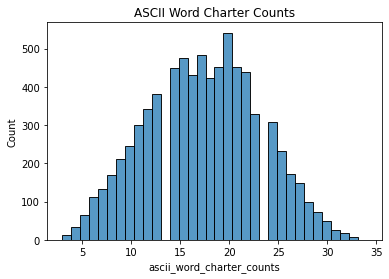

In [21]:
#print(max(df_train.ascii_word_charter_counts))
sns.histplot(df_train['ascii_word_and_space__counts'].astype(int),
             bins=max(df_train.ascii_word_charter_counts)).set_title('ASCII Word and Spaces Counts')


33


Text(0.5, 1.0, 'ASCII Word Counts')

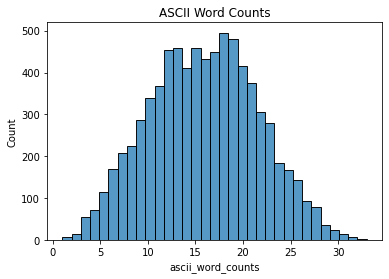

In [22]:
print(max(df_train.ascii_word_counts))
sns.histplot(df_train['ascii_word_counts'].astype(int),
             bins=max(df_train.ascii_word_counts)).set_title('ASCII Word Counts')

# location

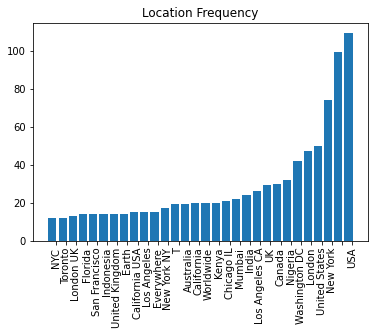

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

df_train['location_list'] = df_train['location'].values.tolist()

df_train['ascii_location_list'] = df_train['location_list'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
word_lists = df_train['ascii_location_list']
word_lists = [word_list for word_list in word_lists if str(word_list) != 'nan']
counts = Counter(word_lists)

labels, values = zip(*counts.items())

# # sort your values in descending order
idx = np.argsort(values)[3072:3102:] # top 30 locations

labels = np.array(labels)[idx]
values = np.array(values)[idx]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)
# add labels
plt.title('Location_Frequency')
plt.xticks(indexes + bar_width, labels, rotation=90)
plt.show()

#keyword analysis

In [32]:
df_train['keyword_charter_count'] = df_train['keyword'].str.len()
print(df_train['keyword_charter_count'].mean())
#print(df_train['keyword_charter_count'])


8.691186128989886
0       3
1       3
2       3
3       3
4       3
       ..
7608    3
7609    3
7610    3
7611    3
7612    3
Name: keyword charter count, Length: 7613, dtype: int64


In [26]:
# word_count
df_train['word_count_kw'] = df_train['keyword'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count_kw'] = df_train['keyword'].apply(lambda x: len(set(str(x).split())))

# char_count
df_train['char_count_kw'] = df_train['keyword'].apply(lambda x: len(str(x)))

import string
# punctuation_count
df_train['punctuation_count_kw'] = df_train['keyword'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count_kw'] = df_train['keyword'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count_kw'] = df_train['keyword'].apply(lambda x: len([c for c in str(x) if c == '@']))

# url_count
df_train['url_count_kw'] = df_train['keyword'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length_kw'] = df_train['keyword'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [28]:
df_train['keyword'] = df_train['keyword'].astype(str)
df_train['unigrams_kw'] = df_train['keyword'].apply(nltk.word_tokenize)


df_train['unigrams_two_kw'] = df_train.apply(lambda row: nltk.word_tokenize(row['keyword']), axis=1).astype(str)

# remove anything but characters and spaces
df_train['ascii_sentences_kw'] = df_train['unigrams_two_kw'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
#print(df_train.ascii_sentences_kw)

df_train['ascii_splitwords_kw'] = [ nltk.word_tokenize( str(sentence) ) for sentence in df_train.ascii_sentences_kw ]
#print(df_train.ascii_splitwords_kw)

df_train['ascii_word_charter_counts_kw'] = [ len(words) for words in df_train.ascii_splitwords_kw ]
#print(df_train.ascii_word_charter_counts_kw)

df_train['ascii_word_counts_kw'] = [ sentence.count(' ') + 1 for sentence in df_train.ascii_sentences_kw ]
#print(df_train.ascii_word_counts_kw)


Text(0.5, 1.0, 'ASCII Word Charter Counts Keyword')

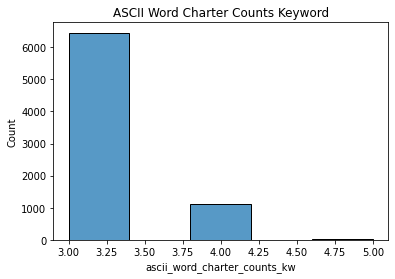

In [29]:
#print(max(df_train.ascii_word_charter_counts_kw))
sns.histplot(df_train['ascii_word_and_spaces_counts_kw'].astype(int),
             bins=max(df_train.ascii_word_and_spaces_counts_kw)).set_title('ASCII Word and Spaces Counts Keyword')

3


Text(0.5, 1.0, 'ASCII Word Counts Keyword')

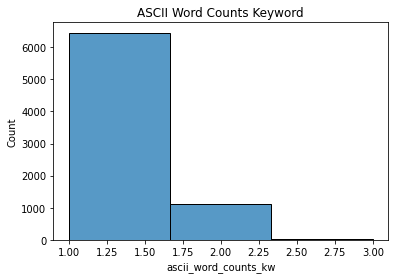

In [30]:
print(max(df_train.ascii_word_counts_kw))
sns.histplot(df_train['ascii_word_counts_kw'].astype(int),
             bins=max(df_train.ascii_word_counts_kw)).set_title('ASCII Word Counts Keyword')

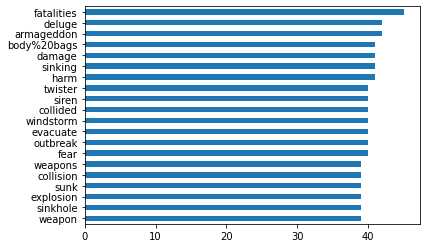

In [36]:
df_train['keyword'].value_counts(ascending=False).iloc[1:21][::-1].plot(kind='barh')

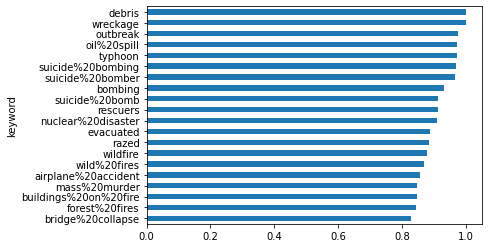

In [38]:
mean_by_keyword = df_train.groupby('keyword')['target'].mean().sort_values(ascending=False)[1:21][::-1]
mean_by_keyword.plot.barh()

In [45]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

In [55]:
useless_text = ''.join(text for text in df_train['text'][df_train['target']==0])
uselessful_text = ''.join(text for text in df_train['text'][df_train['target']==1])
# combine the image with dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc1 = WordCloud(background_color='black', height=1500, width=5000, mask=Mask).generate(useless_text)
wc2 = WordCloud(background_color='black', height=1500, width=5000, mask=Mask).generate(uselessful_text)


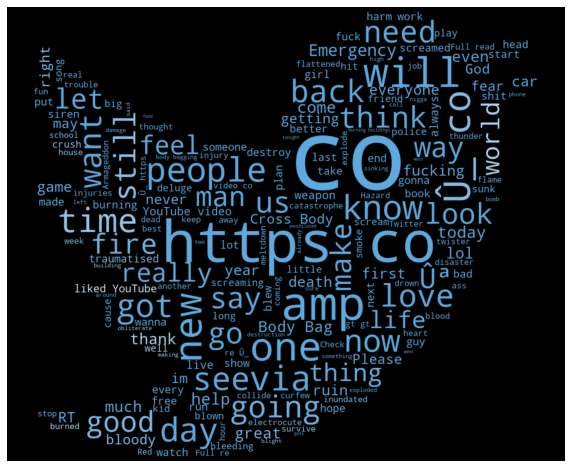

In [56]:
plt.figure(figsize=(10,20))

plt.imshow(wc1.recolor(color_func=image_colors), interpolation='hamming')

plt.axis('off')
plt.show()

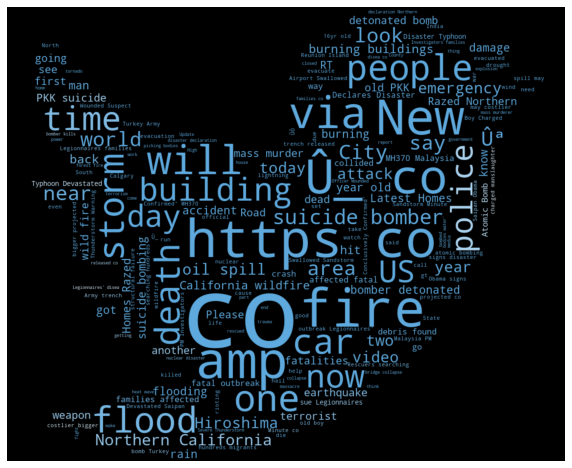

In [57]:
plt.figure(figsize=(10,20))

plt.imshow(wc2.recolor(color_func=image_colors), interpolation='hamming')

plt.axis('off')
plt.show()

####Removing non-unicode characters




####Creation of metadata to help train models
1. Length of tweet (words and characters?) - words done
1. Count of total tweets from same location with same keyword? (Higher numbers might be more indicative of a disaster?)
1. TF and TF-IDF for each tweet
1. Number of @ mentions
1. Number of #
1. Number of URLs?